In [66]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [67]:

# Parse the HTML content
soup = BeautifulSoup("https://www.hubertiming.com/results/2017GPTR10K", 'html.parser')

C:\Users\yossm\AppData\Local\Temp\ipykernel_28356\2235950948.py:2: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup("https://www.hubertiming.com/results/2017GPTR10K", 'html.parser')


In [68]:
# Extract table data
table = soup.find('table', class_='table')

In [69]:
# Initialize empty lists to store data
places = []
times = []

In [70]:
# Extract place and time data from each row
for row in rows:
    place_cell = row.find('th')
    time_cell = row.find('td', text=lambda x: x and ':' in x)  # Find cell containing time
    if place_cell and time_cell:
        places.append(int(place_cell.text))
        minutes, seconds = time_cell.text.split(':')
        total_time_in_seconds = int(minutes) * 60 + int(seconds)
        times.append(total_time_in_seconds)

C:\Users\yossm\AppData\Local\Temp\ipykernel_28356\3517383793.py:4: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  time_cell = row.find('td', text=lambda x: x and ':' in x)  # Find cell containing time


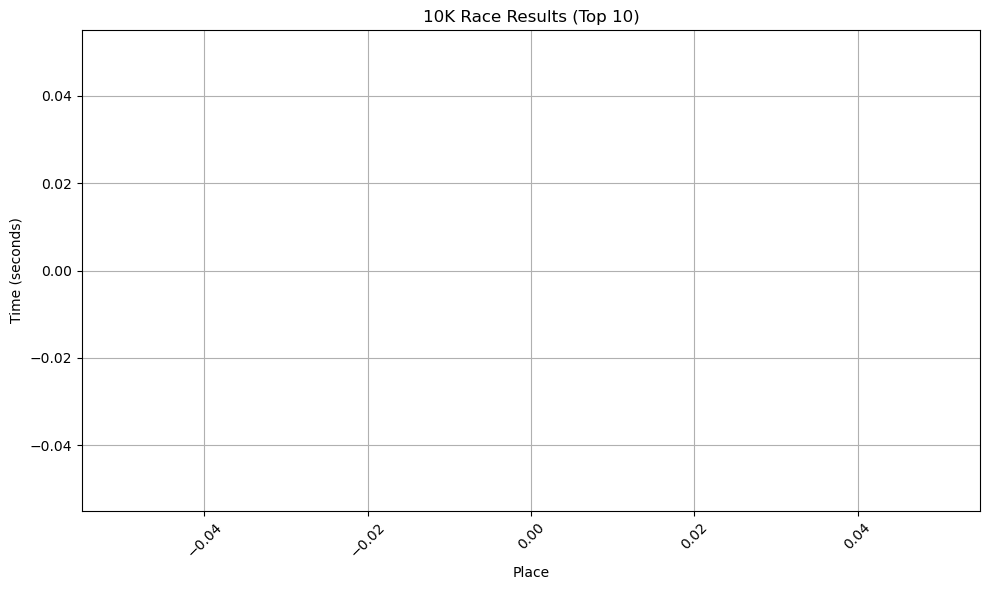

In [71]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(places, times, marker='o', linestyle='-')
plt.xlabel('Place')
plt.ylabel('Time (seconds)')
plt.title('10K Race Results (Top 10)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()